In [ ]:
#Import Libraries

import numpy as np #Numerical Computing.
import os #I/O.
import tensorflow as tf #Machine Learning.
from tensorflow.keras.preprocessing import image_dataset_from_directory #Dataset Generator.
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from skimage.transform import resize
from skimage.io import imread
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
import pickle
from sklearn import metrics
import cv2 
import seaborn as sns


from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.filters.rank import entropy
from skimage.morphology import disk
import random
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "../content/drive/MyDrive/Bio/Data.zip" -d "/content"

In [ ]:
# A questo punto uso la PCA per trainare il modello

bio -> 4000
no_bio -> 4000
(2, 8000)
(8000, 3)
            1st       2nd  labels
0     -0.521787 -1.580670     0.0
1     -3.612100  1.068319     1.0
2      2.263641 -0.055203     0.0
3     -2.365142 -0.340587     1.0
4      6.243146 -1.806172     0.0
...         ...       ...     ...
7995  -0.797009 -1.252909     1.0
7996   9.180362  0.576383     0.0
7997  -4.351712  2.375657     1.0
7998   8.157224 -0.676046     0.0
7999 -10.248800 -0.800478     1.0

[8000 rows x 3 columns]


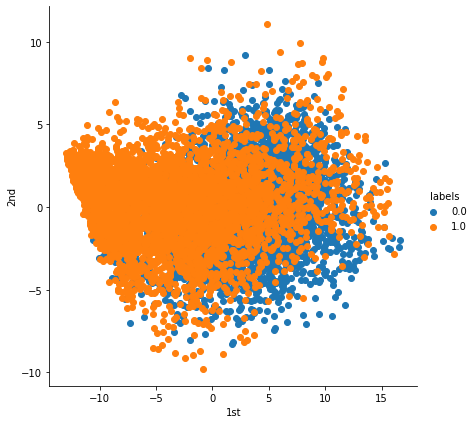

In [ ]:
Categories = ['B','N']
flat_data_arr = []
target_arr = []


bio_file = []
no_bio_file = []

#test 
tb = []
tnb = []

#per rendere gli esperimenti riproducibili
random.seed(77)

# A questo punto uso la PCA per trainare il modello

Categories = ['B','N']
flat_data_arr = []
target_arr = []


bio_file = []
no_bio_file = []

#test 
tb = []
tnb = []

#per rendere gli esperimenti riproducibili
random.seed(77)


#Concateno tutte le immagini

for indice in range(1,5):
  pathb = '../content/TRAIN.'+str(indice)+'/B'
  pathnb = '../content/TRAIN.'+str(indice)+'/N'

  bio_file +=  [pathb+'/'+fn for fn in os.listdir('../content/TRAIN.'+str(indice)+'/B') if ("ORI" in fn) ]
  no_bio_file +=  [pathnb+'/'+fn for fn in os.listdir('../content/TRAIN.'+str(indice)+'/N') if ("ORI" in fn)]


#metto alla pari le due classi
fn_bio = random.sample(bio_file,6000 )
fn_nobio = random.sample(no_bio_file,6000 )

#Abbiamo ora un dataset perfettamente bilanciato
print(f"bio -> {len(fn_bio)}")
print(f"no_bio -> { len(fn_nobio)}")

#Ora che ho i filename posso leggere le varie immaginidata

img = cv2.cvtColor(cv2.imread(fn_bio[10]), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

print(img.shape)

red,green,blue =  cv2.split(img)


plt.imshow(red)
plt.show()

plt.imshow(green)
plt.show()

plt.imshow(blue)
plt.show()

(3, 8000)
(8000, 4)
            1st       2nd       3th  labels
0     -0.521787 -1.580670  0.821805     0.0
1     -3.612100  1.068319 -2.893686     1.0
2      2.263641 -0.055203 -3.837827     0.0
3     -2.365142 -0.340587  0.386285     1.0
4      6.243146 -1.806172 -0.778902     0.0
...         ...       ...       ...     ...
7995  -0.797009 -1.252909 -1.029407     1.0
7996   9.180362  0.576383  2.292590     0.0
7997  -4.351712  2.375657 -2.056774     1.0
7998   8.157224 -0.676046 -1.710203     0.0
7999 -10.248800 -0.800478  0.409484     1.0

[8000 rows x 4 columns]


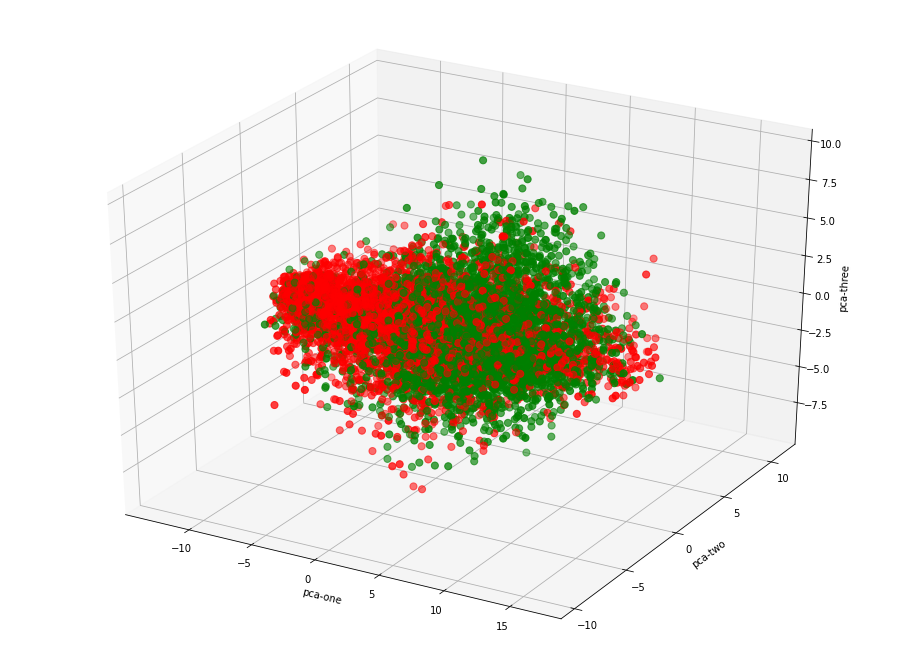

In [ ]:
#PCA 3 componenti
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

pca = decomposition.PCA()
pca.n_components = 3
pca_data = pca.fit_transform(flat_data).T
print(pca_data.shape)
pca_new = np.vstack((pca_data, target)).T
print(pca_new.shape)
df = pd.DataFrame(data=pca_new, columns = ["1st","2nd",'3th',"labels"])
print(df)












'''
fig = plt.figure(figsize=(10, 6))
ax = Axes3D(fig)
fig.add_axes(ax)

# find all the unique labels in the 'name' column
labels = np.unique(df['labels'])
# get palette from seaborn
palette = sns.color_palette("tab10", len(labels))

# plot
for label, color in zip(labels, palette):
    df1 = df[df['labels'] == label]
    ax.scatter(df1['1st'], df1['2nd'], df1['3th'],
               s=40, marker='x', color=color, alpha=0.8, label=label)
ax.set_xlabel('1st')
ax.set_ylabel('2nd')
ax.set_zlabel('3th')

# legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()
'''


#bio sono verdi 
#non bio rossi
colors = ListedColormap(['g','r'])

labels = df['labels'].to_numpy(dtype='int')



ax = plt.figure(figsize=(16,12)).gca(projection='3d')
ax.scatter(
    xs=df['1st'], 
    ys=df['2nd'], 
    zs=df['3th'], 
    c=df["labels"],
    label = labels,
    cmap= colors,s=50
    
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')


plt.show()

